In [57]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\Users\\euna95\\anaconda3\\lib\\site-packages\\PIL\\Image.py'>

* glob 모듈 
: 파일들의 리스트 뽑을 때 사용 :* 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환

In [58]:
#경로 -> 이미지, 라벨값 반환

def load_CIFAR10(path):
    
    path = path
    images = []
    labels = []
    lbl = -1
    for filename in glob(path +"*"): #경로 + *인 모든 파일 반환
        lbl += 1
        for img in glob(filename + "/*.jpg"): #파일 이름 + /*jpg인 모든 파일 반환
            an_img = PIL.Image.open(img) #img 불러오기
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append img_array to training_images 추가
            label = lbl #get label
            labels.append(label) #append label 추가
            
    images = np.array(images)
    labels = np.array(labels)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels= le.fit_transform(labels) 
    labels = labels.reshape(-1,1) #(labels 크기,1)
    
    return images, labels

In [59]:
training_images,training_labels=load_CIFAR10(path="C:/Users/euna95/Desktop/인공지능 학회/Task_0/train/") 

In [60]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", training_labels.shape)

train 이미지 크기: (50000, 32, 32, 3)
train 라벨 크기: (50000, 1)


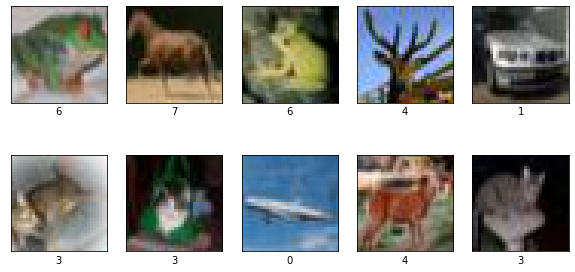

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,50000)
    plt.subplot(2, 5, i + 1) # 여러개의 그래프
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(training_labels[num][0]) #label값
    plt.imshow(training_images[num])
plt.show()

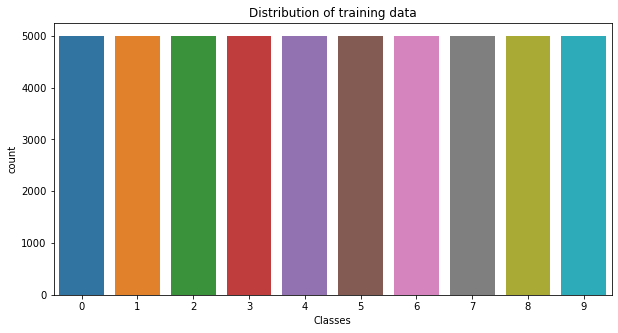

In [62]:
plt.figure(figsize=[10,5])
sns.countplot(training_labels.ravel()) #클래스별 개수
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [63]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [64]:
#train dataset
training_images,training_labels=load_CIFAR10(path="C:/Users/euna95/Desktop/인공지능 학회/Task_0/train/") 

In [65]:
#create test dataset

path = 'C:/Users/euna95/Desktop/인공지능 학회/Task_0/test/'

test_images = []
test_idx = []
lbl=-1
flist = sorted(glob(path + '*.jpg')) #정렬

for filename in flist:
    lbl+=1
    an_img = PIL.Image.open(filename) #이미지 불러오기
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images  추가
    
    label = lbl #get label
    test_idx.append(label) #append label추가
    
test_images = np.array(test_images)


print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
[0, 1, 2, 3, 4]


[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],

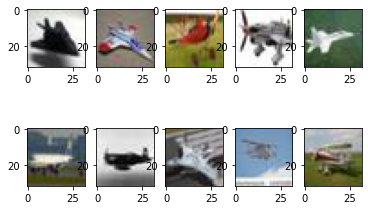

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i])
    print(training_labels[i], end=",")
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

X_test = test_images

In [68]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


In [69]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [70]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

In [71]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)         

In [73]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
313/313 [==============================] - 38s 119ms/step - loss: 1.8125 - accuracy: 0.3319 - val_loss: 1.5710 - val_accuracy: 0.4384
Epoch 2/10
313/313 [==============================] - 87s 277ms/step - loss: 1.4910 - accuracy: 0.4577 - val_loss: 1.3750 - val_accuracy: 0.5214
Epoch 3/10
313/313 [==============================] - 82s 263ms/step - loss: 1.3619 - accuracy: 0.5095 - val_loss: 1.2384 - val_accuracy: 0.5718
Epoch 4/10
313/313 [==============================] - 84s 268ms/step - loss: 1.2823 - accuracy: 0.5391 - val_loss: 1.1681 - val_accuracy: 0.5996
Epoch 5/10
313/313 [==============================] - 74s 236ms/step - loss: 1.2144 - accuracy: 0.5652 - val_loss: 1.1215 - val_accuracy: 0.6103
Epoch 6/10
313/313 [==============================] - 69s 219ms/step - loss: 1.1674 - accuracy: 0.5837 - val_loss: 1.0577 - val_accuracy: 0.6264
Epoch 7/10
313/313 [==============================] - 69s 222ms/step - loss: 1.1274 - accuracy: 0.5976 - val_loss: 1.0563 - val_ac

In [74]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['train\\horse', 'train\\bird', 'train\\airplane', 'train\\dog',
       'train\\airplane'], dtype='<U16')